In [9]:
#Import EDA libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#Read in the data 

customers = pd.read_csv('Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
# Get data info
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [26]:
#Set visualization style 

sns.set_style('whitegrid')
sns.set_palette('GnBu_d')

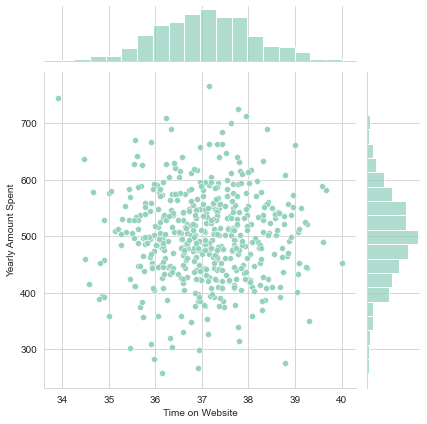

In [27]:
#Jointplot of Time on website vs yearly amount spent
sns.jointplot(x=customers['Time on Website'],y=customers['Yearly Amount Spent'])

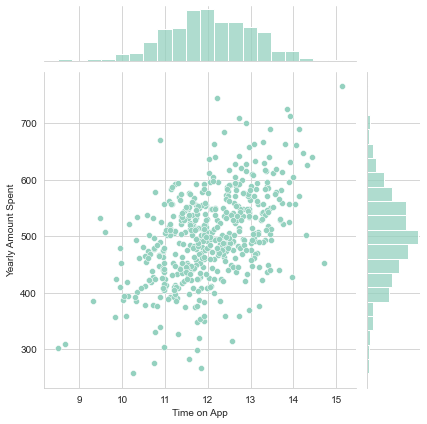

In [28]:
#Jointplot of Time on app vs yearly amount spent
sns.jointplot(x=customers['Time on App'],y=customers['Yearly Amount Spent'])

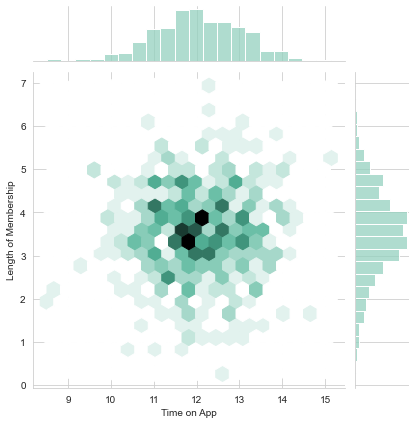

In [29]:
sns.jointplot(x=customers['Time on App'],y=customers['Length of Membership'],kind='hex')

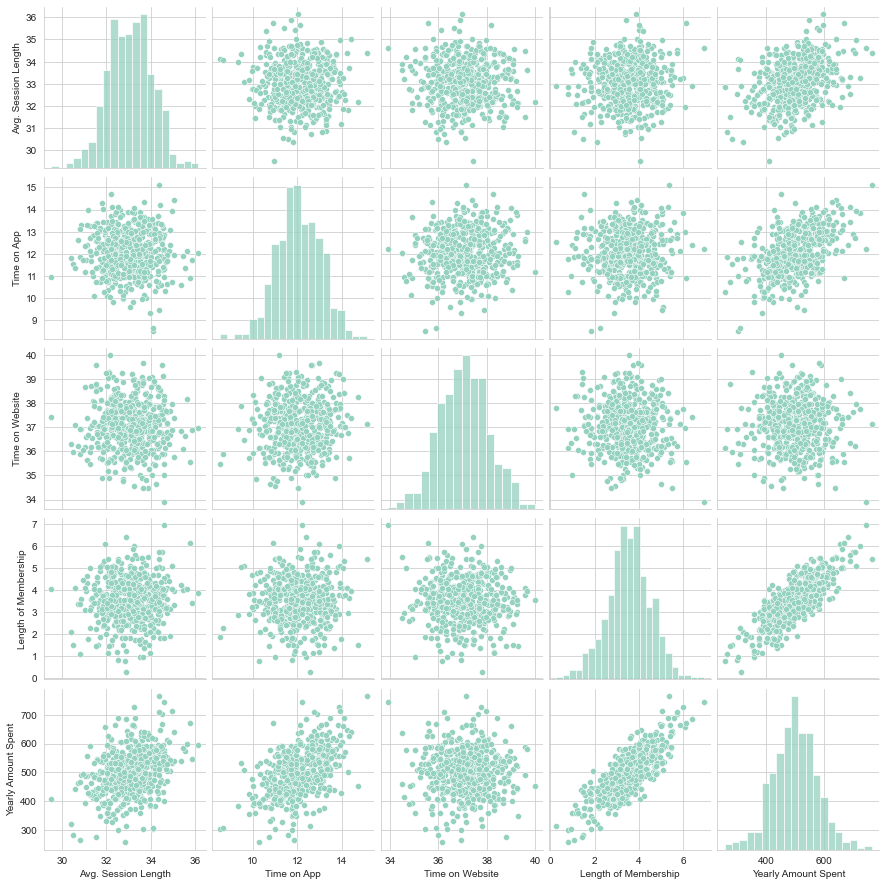

In [30]:
sns.pairplot(customers)

In [31]:
#Length of membership seems to be the most correlated feature with yearly amount spent

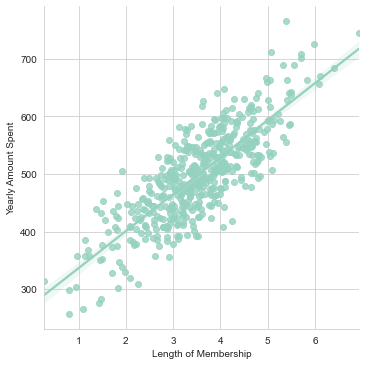

In [35]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [63]:
#Create training anf testing data 

customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [38]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

y = customers['Yearly Amount Spent']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [64]:
#Training the model

from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [46]:
predictions = lm.predict(X_test)

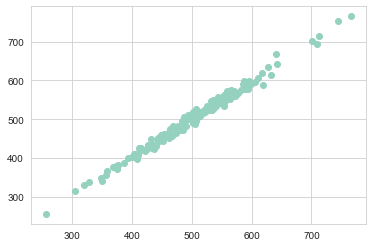

In [65]:
plt.scatter(y_test,predictions)

In [67]:
#Evaluating the model

In [49]:
from sklearn import metrics

In [54]:
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  7.228148653430853
MSE:  79.81305165097487
RMSE:  8.933815066978656


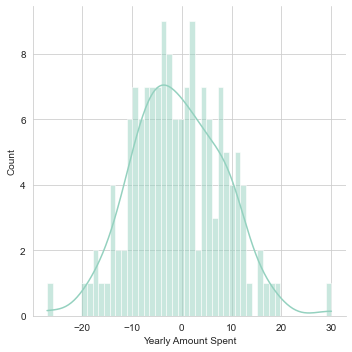

In [57]:
sns.displot(y_test - predictions, bins = 50, kde=True)

In [59]:
pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [62]:
customers[['Time on App', 'Time on Website']].sum()

Time on App         6026.243969
Time on Website    18530.222710
dtype: float64

In [68]:
#Mohan S Acharya, Asfia Armaan, Aneeta S Antony : 
#A Comparison of Regression Models for Prediction of Graduate Admissions, 
#IEEE International Conference on Computational Intelligence in Data Science 2019

#Dataset to attempt Linear regression models

In [69]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [71]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


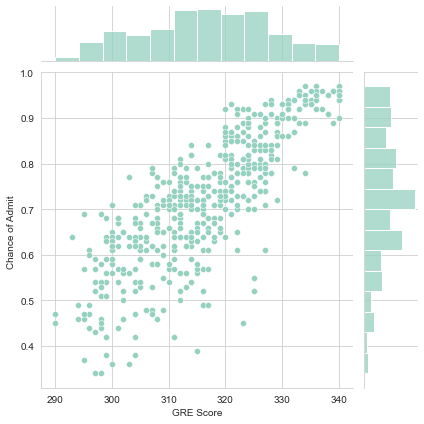

In [72]:
sns.jointplot(x=data['GRE Score'],y=data['Chance of Admit '])

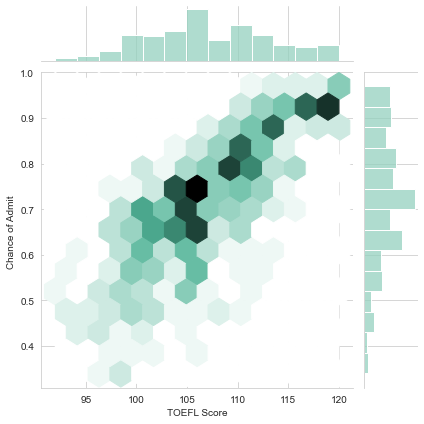

In [74]:
sns.jointplot(x=data['TOEFL Score'],y=data['Chance of Admit '],kind='hex')

In [75]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


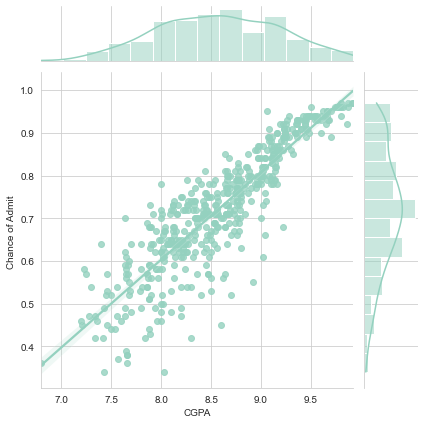

In [77]:
sns.jointplot(x=data['CGPA'],y=data['Chance of Admit '],kind='reg')

In [78]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [79]:
X = data[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']]

y -= data['Chance of Admit ']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lm2 = LinearRegression()

In [84]:
lm2.fit(X_train,y_train)

LinearRegression()

In [90]:
print(lm2.intercept_)

567.8603833791499


In [91]:
lm2.coef_

array([-0.05649313,  0.91384992, -4.49618961, -1.09302154, -0.20182084,
        5.2832566 , 14.91250624, -9.27369433])

In [97]:
model_data = pd.DataFrame(lm2.coef_,X_train.columns,columns=['Coefficient'])
model_data

,Coefficient
Serial No.,-0.056493
GRE Score,0.913850
TOEFL Score,-4.496190
University Rating,-1.093022
SOP,-0.201821
LOR,5.283257
CGPA,14.912506
Research,-9.273694


In [99]:
model_data.drop(['Serial No.'],axis=0,inplace=True)

In [100]:
model_data

,Coefficient
GRE Score,0.913850
TOEFL Score,-4.496190
University Rating,-1.093022
SOP,-0.201821
LOR,5.283257
CGPA,14.912506
Research,-9.273694


In [104]:
predict = lm2.predict(X_test)
predict

array([505.80390891, 477.38139474, 493.81926286, 527.11102482,
       508.6495163 , 486.20288634, 494.02798032, 507.92560244,
       487.82437499, 474.48100402, 468.02518069, 467.90333853,
       516.07583167, 497.83442117, 503.99232014, 490.88847631,
       532.27265172, 493.96877396, 475.58866129, 486.47957643,
       508.32090857, 503.82420678, 496.04534124, 475.9113641 ,
       510.18478628, 490.75851798, 485.76538118, 494.70807541,
       506.45818347, 491.9773937 , 523.63634239, 505.250798  ,
       492.30610041, 501.00705242, 514.92387587, 493.30643428,
       533.32078403, 488.4986453 , 519.81363782, 485.68130126,
       488.07905708, 478.11334452, 466.73040681, 496.03888847,
       507.86468405, 506.71403336, 522.91287841, 502.69797968,
       526.42492499, 478.39068498, 484.6085197 , 511.46392218,
       510.73471391, 513.49698658, 500.48397738, 494.11242834,
       477.53050215, 493.59830185, 495.71476132, 528.43284865,
       476.44748682, 479.57410254, 507.50613429, 477.87

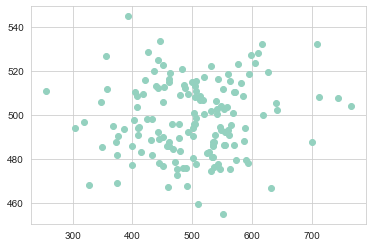

In [105]:
plt.scatter(y_test,predict)

In [106]:
from sklearn import metrics

In [107]:
metrics.mean_absolute_error(y_test,predict)

67.36857776901645